# Derivatives (Symbolic & Numeric) (Mr. P Solver)

Video Link: https://youtu.be/DeeoiE22bZ8

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbEp2TkRlUzI0V2dpUU5EbkZlUXdQQXFTa05LQXxBQ3Jtc0ttdldUa1BMWDNrSWhhaHBPODNSZ3hSeDMzeHQ3dXhHVlpoSnJoQUpTcW5za0hGdU1jNmdyWHltTHlSLUdZcHFFeXJaSVBfcHFJd2RxekFwZ1ExTnZxc19VaERhM3JQSW1fTmN1eXNHc1UxdWtEMktWZw&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Fderivatives1.ipynb&v=DeeoiE22bZ8

In [17]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt

In [18]:
from scipy.misc import derivative

## Symbolic Case

Here the function is known and we want to calculate the derivative using Sympy.

Example: $$ f(x) = e^{-ax^2}\cdot \sin(bx) \cdot \ln(c\sin(x)/x) $$

In [19]:
x, a, b, c = smp.symbols('x a b c')
f1 = smp.exp(-a* x**2)* smp.sin(b*x)* smp.log(c*smp.sin(x)/x)
f1

exp(-a*x**2)*log(c*sin(x)/x)*sin(b*x)

In [20]:
f1p = smp.diff(f1,x)
f1p

-2*a*x*exp(-a*x**2)*log(c*sin(x)/x)*sin(b*x) + b*exp(-a*x**2)*log(c*sin(x)/x)*cos(b*x) + x*(c*cos(x)/x - c*sin(x)/x**2)*exp(-a*x**2)*sin(b*x)/(c*sin(x))

In [21]:
f1pp = smp.diff(f1,x,2)  # 2nd order derivative
f1pp

(-4*a*b*x*log(c*sin(x)/x)*cos(b*x) - 4*a*x*(cos(x) - sin(x)/x)*sin(b*x)/sin(x) + 2*a*(2*a*x**2 - 1)*log(c*sin(x)/x)*sin(b*x) - b**2*log(c*sin(x)/x)*sin(b*x) + 2*b*(cos(x) - sin(x)/x)*cos(b*x)/sin(x) - ((cos(x) - sin(x)/x)*cos(x)/sin(x) + sin(x) - (cos(x) - sin(x)/x)/x + 2*cos(x)/x - 2*sin(x)/x**2)*sin(b*x)/sin(x))*exp(-a*x**2)

In [22]:
f1p.subs([(a,1),(b,2),(c,3),(x,1)])

-2*exp(-1)*log(3*sin(1))*sin(2) + 2*exp(-1)*log(3*sin(1))*cos(2) + (-3*sin(1) + 3*cos(1))*exp(-1)*sin(2)/(3*sin(1))

In [23]:
f1p.subs([(a,1),(b,2),(c,3),(x,1)]).evalf()

-1.02277462733248

**Plotting**

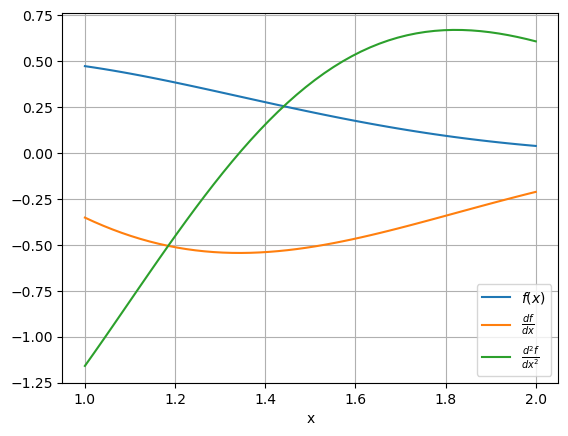

In [24]:
f1f = smp.lambdify([x,a,b,c], f1)
f1pf = smp.lambdify([x,a,b,c], f1p)
f1ppf = smp.lambdify([x,a,b,c], f1pp)

x1 = np.linspace(1,2,50)
y1 = f1f(x1, a=0.5, b=1, c=3)
yp1 = f1pf(x1, a=0.5, b=1, c=3)
ypp1 = f1ppf(x1, a=0.5, b=1, c=3)

plt.plot(x1,y1,label='$f(x)$')
plt.plot(x1,yp1,label=r'$\frac{df}{dx}$')
plt.plot(x1,ypp1,label=r'$\frac{d^2f}{dx^2}$')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

## Numerical Case

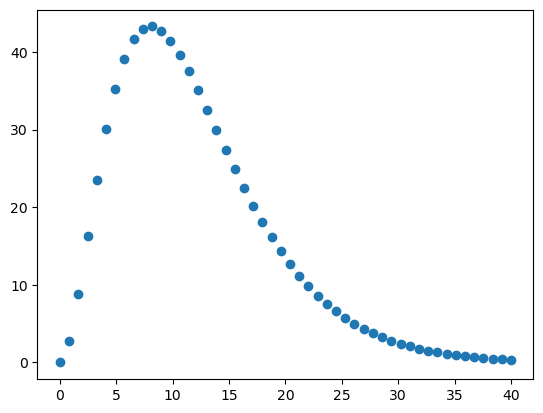

In [25]:
# creating data
xdata = np.linspace(0,40,50)
ydata = 5*xdata**2*np.exp(-0.25*xdata)
plt.scatter(xdata,ydata)

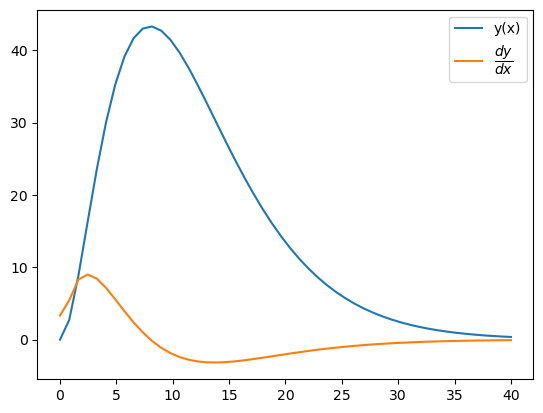

In [26]:
dydx = np.gradient(ydata,xdata)

plt.plot(xdata, ydata, label='y(x)')
plt.plot(xdata,dydx, label=r'$\dfrac{dy}{dx}$')
plt.legend()
plt.show()

`np.gradient` works good if the data is smooth but not if the data is noisy. There, before using `np.gradient`, we makes a smooth curve by the following method.

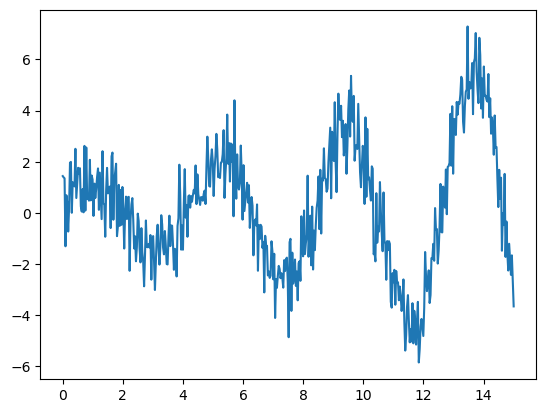

In [27]:
xdata = np.linspace(0.001,15,500)
ydata = np.exp(xdata/8)*np.sin(1.5*xdata) +0.9*np.random.randn(len(xdata))
plt.plot(xdata,ydata)

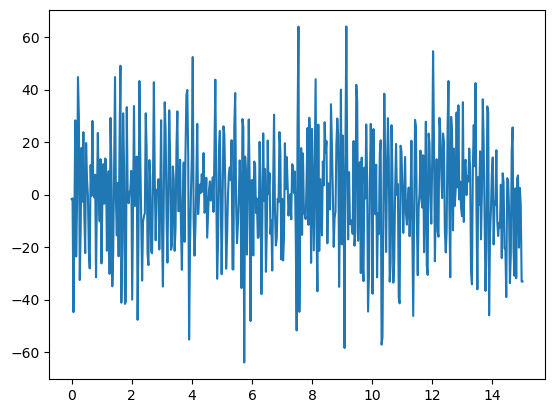

In [28]:
dydx = np.gradient(ydata,xdata)
plt.plot(xdata,dydx)

We can get a smooth graph by using `np.convolve`.

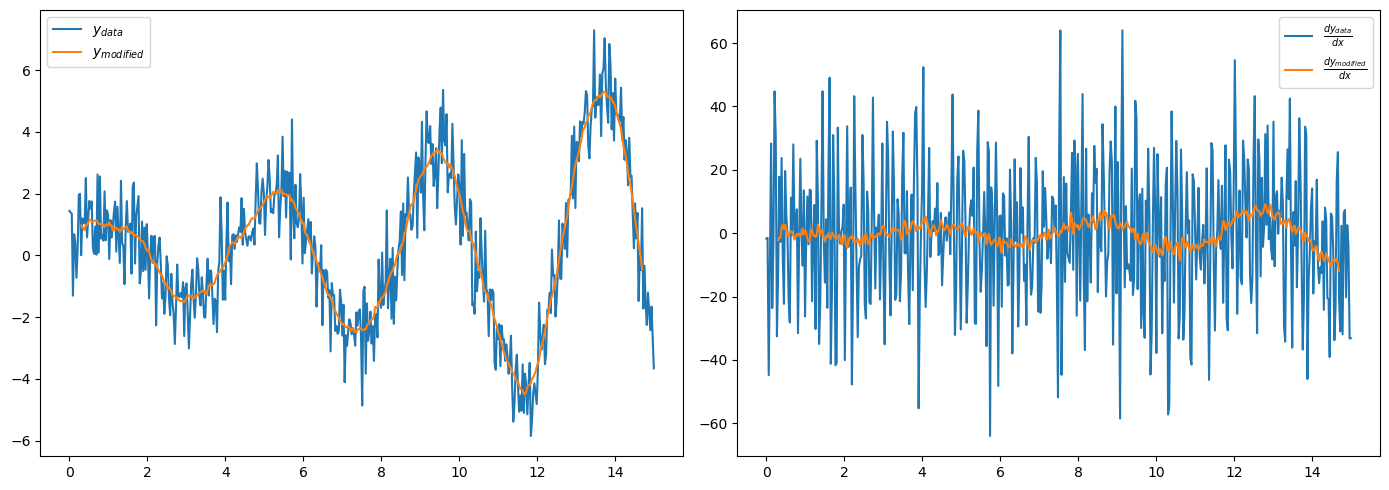

In [29]:
filt = np.ones(21)/21
y1 = np.convolve(ydata,filt,mode='valid')
x1 = xdata[10:-10]  # making the length equal to len(y1)
dy1dx = np.gradient(y1,x1)

fig, ax = plt.subplots(1,2, figsize = (14,5))
ax1 = ax[0]
ax1.plot(xdata,ydata, label='$y_{data}$')
ax1.plot(x1,y1, label='$y_{modified}$')
ax2 = ax[1]
ax2.plot(xdata,dydx, label=r'$\frac{dy_{data}}{dx}$')
ax2.plot(x1,dy1dx, label=r'$\frac{dy_{modified}}{dx}$')
[i.legend() for i in ax]
fig.tight_layout()
plt.show()

Have your own data and watch this section.

## Quasi-Symbolic Case

We don't know the function but the function is given by a typical expression.

Example: $$ f(u) = \text{max} \left\{ \left|e^{-x_iu^2} - y_i\right| \right\} $$

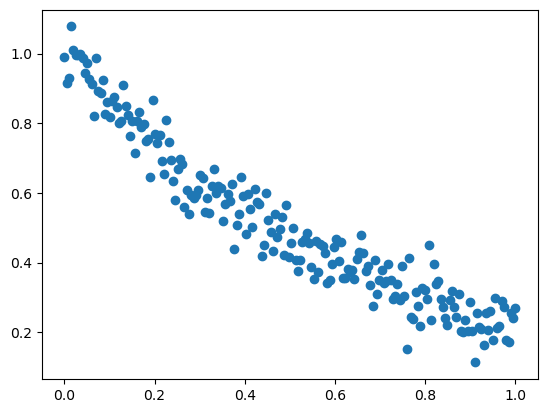

In [30]:
# creating data
x = np.linspace(0,1,200)
y = np.exp(-1.5*x) + 0.05*np.random.randn(len(x))
plt.scatter(x,y)

Defining the Function and plotting

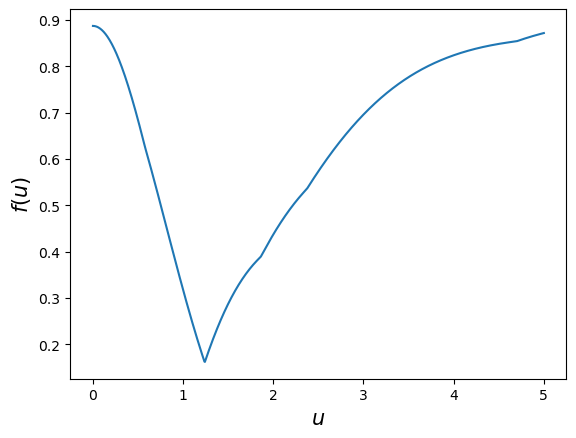

In [31]:
def f(u):
    return max(abs(np.exp(-x*u**2)-y))

u = np.linspace(0,5,1000)
fu = np.vectorize(f)(u)

plt.plot(u,fu)
plt.xlabel('$u$', fontsize=15)
plt.ylabel('$f(u)$', fontsize=15)
plt.show()

Derivative of the function and plotting that.

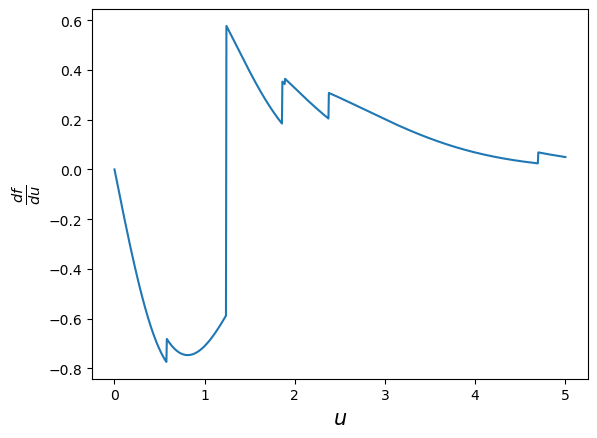

In [32]:
dfdu = np.vectorize(derivative)(f,u,dx=1e-6)
plt.plot(u,dfdu)
plt.xlabel('$u$', fontsize=15)
plt.ylabel(r'$\frac{df}{du}$', fontsize=15)
plt.show()